In [1]:
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


2024-08-11 18:04:26.960214: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 18:04:26.960305: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 18:04:27.077059: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_path='/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/train'

In [3]:
os.listdir(train_path)

['not fractured', 'fractured']

In [4]:
X=[]
y=[]
categories=['fractured','not fractured']
for i in categories:
  subdir=os.path.join(train_path,i)
  images=os.listdir(subdir)
  for j in images:
    image=os.path.join(subdir,j)
    img_arr=imread(image)
    img_resized=resize(img_arr,(224,224,1))
    X.append(img_resized)
    y.append(categories.index(i))
  print(f"{i} done")

fractured done
not fractured done


In [5]:
len(X),len(y)

(8863, 8863)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
len(X_train),len(y_train)

(7090, 7090)

In [8]:
len(X_test),len(y_test)

(1773, 1773)

In [9]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)


In [10]:
X_train.shape

(7090, 224, 224, 1)

In [11]:
X_test.shape

(1773, 224, 224, 1)

In [12]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(224,224,1),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,'sigmoid'))


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
early_stopping=EarlyStopping('loss',patience=5,restore_best_weights=True)

In [15]:


model.fit(X_train,y_train,epochs=30,batch_size=25,callbacks=[early_stopping])

Epoch 1/30
  3/284 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.5133 - loss: 0.9757

I0000 00:00:1723399639.328124     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723399639.347129     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


284/284 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.6707 - loss: 0.6259
Epoch 2/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9282 - loss: 0.1830
Epoch 3/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9883 - loss: 0.0338
Epoch 4/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9989 - loss: 0.0057
Epoch 5/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9961 - loss: 0.0120
Epoch 6/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9914 - loss: 0.0227
Epoch 7/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9988 - loss: 0.0035
Epoch 8/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9996 - loss: 0.0021
Epoch 9/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9921 - loss: 0.0232
Epoch 10/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9990 - loss: 0.0032
Epoch 11/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 1.0000 - loss: 1.2784e-04
Epoch 12/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 29m

In [16]:
model.evaluate(X_test,y_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9721 - loss: 0.2319


[0.14033007621765137, 0.9785674214363098]

In [17]:
model.save('my_model.h5')

In [70]:
def predict(image):
    img_arr=imread(image)
    img_resized=resize(img_arr,(224,224,1))
    new_img=img_resized.reshape(1,224,224,1)
    prediction=model.predict(new_img,verbose=0)
    #return prediction
    if prediction.item()>=0.5:
        print('NOT FRACTURED')
    else:
        print('FRACTURED')

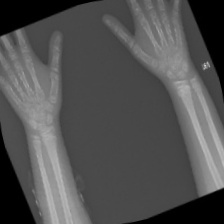

In [79]:
from PIL import Image
image='/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/train/fractured/10-rotated2-rotated1-rotated3.jpg'
im=Image.open(image)
im

In [80]:
predict(image)

FRACTURED


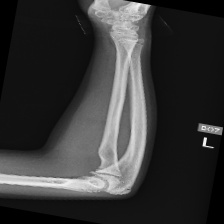

In [82]:
image='/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/train/not fractured/10-rotated1.jpg'
im=Image.open(image)
im

In [83]:
predict(image)

NOT FRACTURED
